## **Introduction to Data Science - Nhập môn khoa học dữ liệu - CSC14119**
### **HCMUS - Trường Đại học khoa học tự nhiên - Nov 2024.**
### **Đồ án thực hành cuối kì - Handling Real-World Problem.**
#### **Due:** 24/12/2024.
#### **Lớp:** 22_21.
#### **Giảng viên hướng dẫn:** Thầy Lê Ngọc Thành - Thầy Lê Nhựt Nam.
#### **STT nhóm:** 9.
---
### **Data Modeling - 02**
**Problem**: Làm thế nào để phân nhóm các món ăn dựa trên sự tương đồng về thành phần gia vị và nguyên liệu, giúp người dùng dễ dàng lựa chọn hoặc khám phá các món ăn có đặc điểm chung?

**Description**: Việc phân loại món ăn theo gia vị và nguyên liệu giúp chia các món thành từng nhóm có sự tương đồng cao về thành phần chế biến. Điều này không chỉ hỗ trợ người nấu tìm kiếm các món ăn phù hợp với nguyên liệu sẵn có mà còn giúp hệ thống gợi ý món ăn theo sở thích hoặc nhu cầu. Ví dụ, những món ăn có cùng loại gia vị đặc trưng như ớt, tỏi, hoặc cùng nhóm nguyên liệu như thịt gà, rau xanh sẽ được xếp vào cùng một nhóm, giúp quá trình lựa chọn món trở nên nhanh chóng và khoa học hơn.

**Solution**: Sử dụng mô hình K-Means Clustering.

### 1. Xác định số cụm phù hợp bằng phương pháp Khuỷu tay (Elbow Method)

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

pd.set_option('display.max_colwidth', None)

In [36]:
ingredients_df = pd.read_csv("../Assert/ingredients.csv",sep=",")
ingredients_df.drop_duplicates(keep='first',inplace=True)
ingredients_df.head()

,Name of dish,soda,turmeric mixture,herb,yogurt,butter,beef bone,chili lemongrass fish sauce,beef fillet,chipotle smoked pepper powder,...,kiwi,lime juice,tea leaves,white sesame,eel,green onion,ice cubes,pigeon,chinese sausages,white vinegar
0,10 common problems and mistakes when making bread,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11 ways to use leftover egg yolks,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12 types of nuts for baking,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14 ways to make Sponge cake/Gato for birthday cake decoration,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14 ways to use leftover egg whites,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
ingredients = ingredients_df.iloc[:,1:]
dishes = ingredients_df.iloc[:,0] 

c:\Users\hoang\anaconda3\envs\min_ds-env2\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


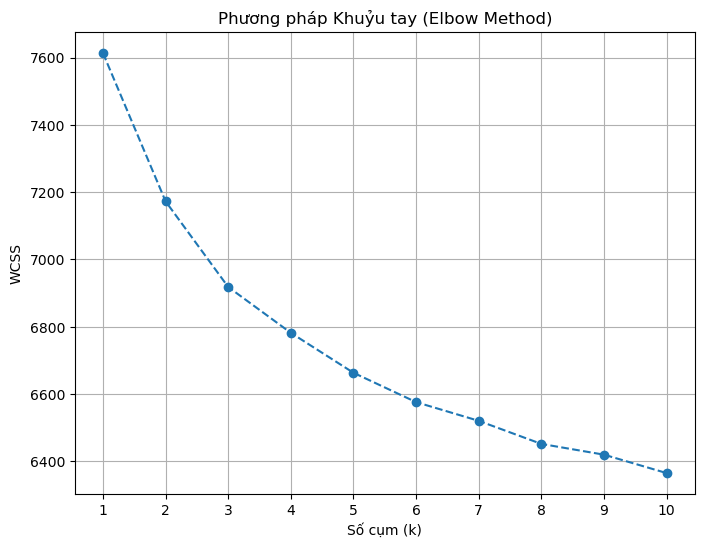

In [38]:
# Tránh bị memory leak khi sử dụng thuật toán KMeans
import os
os.environ["OMP_NUM_THREADS"] = "4"

# Danh sách để lưu giá trị WCSS
wcss = []

# Duyệt qua các giá trị k từ 1 đến 10 
K_values = range(1, 11)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(ingredients)
    wcss.append(kmeans.inertia_)  

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8,6))
plt.plot(K_values, wcss, marker='o', linestyle='--')
plt.title('Phương pháp Khuỷu tay (Elbow Method)')
plt.xlabel('Số cụm (k)')
plt.ylabel('WCSS')
plt.xticks(K_values)
plt.grid(True)
plt.show()

#### Nhận xét chung
- Từ k = 1 đến k = 3: Đường cong giảm khá mạnh, cho thấy việc tăng số cụm từ 1 lên 3 giúp giảm đáng kể WCSS.

- Từ k = 3 trở đi: Đường cong tiếp tục giảm nhưng với tốc độ chậm hơn nhiều.

#### Kết luận
- Dựa vào biểu đồ, có thể cho rằng điểm **khuỷu tay** nằm ở vị trí k = 3. 

### 2. Xây dựng mô hình K-Means Clustering với số cụm = 3

In [39]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(ingredients)

predict_labels = kmeans.predict(ingredients)

In [40]:
# Lấy các món ăn cùng label vào 1 nhóm
def group_dishes(predict_labels):
    first_group = dishes[predict_labels == 0]
    second_group =  dishes[predict_labels == 1]
    third_group =  dishes[predict_labels == 2]

    return (first_group, second_group, third_group)

In [41]:
# Lưu các phần tử chung cụm thành các mảng 
first_group, second_group, third_group = group_dishes(predict_labels)

In [42]:
first_group.to_frame().sample(5)

,Name of dish
924,Kitchen Art Homechef Series: Italian Shrimp Pasta (With Video Tutorial)
847,Braised Duck with dracontomelon Using Instant Pot Pressure Cooker
584,Porridge with Cartilage and Ribs by Cooking Robot Team Cuisine
608,Super Spicy Herb Grilled Chicken
325,Salty donuts


In [43]:
second_group.to_frame().sample(5)

,Name of dish
58,Chocolate Vanilla Butter Cake
901,Oatmeal Pancake
979,Almond Cookies
947,Strawberry Shortcake and Peppermint Cream
697,Chocolate Dipped Sugar Cookies to Celebrate November 20


In [44]:
third_group.to_frame().sample(5)

,Name of dish
111,Distinguishing the 10 most popular types of cheese
622,Lychee Tea
73,Ciabatta Bread
695,Super Fast Kumquat Tea
224,How to make rich almond cake


### Nhận xét
- Ở nhóm đầu tiên, các món có xu hướng được làm từ **thịt**, **cá**, **tôm**.

- Ở nhóm thứ 2 chủ yếu là các **món bánh**.

- Ở nhóm thứ 3 là các **món ăn vặt**, **chè**, **thức uống tráng miệng**.

In [45]:
def printRecipes(substitute_recipes):
    for recipe, substitutes in substitute_recipes.items():
        print(f"Substitutive dishes for: {recipe}")
        for i, substitute in enumerate(substitutes):
            print(f"{i + 1}. {substitute}")
        print("")

In [46]:
def substituteRecipes(recipes):
    subsitiute_recipes = {}
    
    for recipe in recipes:
        if recipe in first_group.values:
            subsitiute_recipes[recipe] = first_group.sample(5).values
        elif recipe in second_group.values:
            subsitiute_recipes[recipe] = second_group.sample(5).values
        elif recipe in third_group.values:
            subsitiute_recipes[recipe] = third_group.sample(5).values

    return subsitiute_recipes

In [47]:
input = ['Muesli','Grilled Orange Chicken','Chocolate Ricotta Muffin']
substitute_recipes = substituteRecipes(input)
printRecipes(substitute_recipes)

Substitutive dishes for: Muesli
1. Bo Bo Cha Cha Tea
2. Korean Style Bulgogi Grilled Beef
3. Ginseng Bo Luong Water
4. Cookie and cream cheese truffle chocolate balls
5. 11 ways to use leftover egg yolks

Substitutive dishes for: Grilled Orange Chicken
1. Braised Duck in Coconut Juice
2. Fried Fish Balls
3. Sweet and Sour Pickled Eggs with Natural Pink Color
4. Instant Pot Bolognese Spaghetti
5. Instant Pot Chicken Alfredo Pasta

Substitutive dishes for: Chocolate Ricotta Muffin
1. How to make Pineapple Cookies
2. How to make simple green tea shortbread
3. Lady fingers
4. Delicious carrot cake recipe – Carrot cake nuts with cream cheese icing
5. Monte Carlo Cookies with Cream & Fruit Jam



### 3. Giao diện GUI

In [48]:
import tkinter as tk
from tkinter import messagebox

In [61]:
class SubstituteRecipeRecommender:
    def __init__(self, root):
        self.root = root
        self.root.title("Hệ thống đề xuất món ăn thay thế")

        # Kích thước cửa sổ
        self.window_width = 800
        self.window_height = 500

        # Lấy kích thước màn hình
        screen_width = self.root.winfo_screenwidth()
        screen_height = self.root.winfo_screenheight()

        # Tính toán tọa độ x và y để cửa sổ ở chính giữa
        x = (screen_width // 2) - (self.window_width // 2)
        y = (screen_height // 2) - (self.window_height // 2)

        # Đặt kích thước và vị trí cửa sổ
        self.root.geometry(f"{self.window_width}x{self.window_height}+{x}+{y}")

        self.bg_photo = tk.PhotoImage(file="Background.png")

        # Canvas
        self.canvas = tk.Canvas(self.root, width=self.window_width, height=self.window_height, highlightthickness=0)
        self.canvas.grid(row=0, column=0, sticky="nsew")

        # Đặt ảnh nền
        self.canvas.create_image(0, 0, anchor="nw", image=self.bg_photo)

        # Thiết lập grid để Canvas mở rộng khi thay đổi kích thước
        self.root.grid_rowconfigure(0, weight=1)
        self.root.grid_columnconfigure(0, weight=1)

        # Label
        self.label = tk.Label(self.canvas,text="Input recipes:",bg="brown",fg='white',font=("calibri",16,"bold"),relief='solid')
        self.label.place(x=163, y=50)

        # Entry để nhập nguyên liệu
        self.entry = tk.Entry(self.canvas,width=27,font=("Calibri", 16),relief='solid',bd=2)
        self.entry.place(x=80, y=100)

        # Button để gợi ý món ăn
        self.recommend_button = tk.Button(self.canvas,text="ENTER",command=self.recommend,bg='brown',fg='white',font=("calibri",16,"bold"),relief=tk.RAISED)
        self.recommend_button.place(x=190, y=150)

        # Label để hiển thị kết quả
        self.result_label = tk.Label(self.canvas,text="",justify="left",anchor="w",font=("calibri",15),width=64,height=6,relief="solid")
        self.result_label.place(x=70, y=240) 

    def recommend(self):
        recipe = self.entry.get()
        substitute_recipes = substituteRecipes([recipe])

        if substitute_recipes:
            recipe_text = ""
            for i, substitute in enumerate(substitute_recipes[recipe]):
                recipe_text +=  f"{i + 1}. {substitute}\n"
            self.result_label.config(text=recipe_text, wraplength=630)
            
        else:
            self.result_label.config(text="Không tìm thấy món ăn phù hợp!")

In [62]:
root = tk.Tk()
app = SubstituteRecipeRecommender(root)
root.mainloop()